In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [2]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "IID partition", 
                                                0.3: "Non-IID partition (α=0.3)", 
                                                })
    # sk = [0, 0.1, 0.01, 0.001]
    # data_temp = data_temp.set_index('Scaling').loc[sk].reset_index()
    # print(data_temp.size)
    return data_temp

In [13]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):

        if "LN" in path: continue
        if "WD" in path: continue

        data = pd.read_csv(path)
        data["Mode"] = data["mode"]
        data["Scaling"] = "vanilla"

        
        if "FCs" in path: 
            if "FCs0.1E1w1_Mean5" in path: 
                data["Mode"] += " (FCs0.1E1)"
                pass
            else:
                continue
        
        if "Mean1" in path:
            data["Mode"] += "+M1"
            continue
        elif "Mean2" in path:
            data["Mode"] += "+M2"
            continue
        elif "Mean5" in path:
            data["Mode"] += "+M5"
            continue
        else:
            # continue
            pass
        
        if "G11" in path and "LR1.2" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR1.2)"
        elif "G11" in path and "LR1.5" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR1.5)"
        elif "G11" in path and "LR1.0" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR1.0)"
        elif "G11" in path and "LR0.8" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR0.8)"
        elif "G11" in path and "LR0.6" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR0.6)"
        elif "G11" in path and "LR0.3" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR0.3)"
        elif "G11" in path: continue

        if "gs11" in path: continue
            # data["Mode"] += "+gs11"
            # continue
        elif "gs12" in path: 
            continue
        elif "gs21" in path: continue
        elif "gs22" in path: continue
        elif "gs31" in path: 
            data["Mode"] += "+gs31"
            continue
            # continue
        elif "gs32" in path: 
            data["Mode"] += "+gs32"
            continue
        elif "gs411" in path: 
            # data["Mode"] += "+gs411"
            data["Scaling"] = "x 0.01"
        elif "gs412" in path: 
            # data["Mode"] += "+gs412"
            data["Scaling"] = "x 0.001"
        elif "gs41" in path: 
            # data["Mode"] += "+gs41"
            data["Scaling"] = "x 0.1"
        elif "gs421" in path: 
            data["Mode"] += "+gs421"
            continue
        elif "gs41" in path: 
            data["Mode"] += "+gs41"
            # continue
        elif "gs42" in path: 
            data["Mode"] += "+gs42"
            continue
        elif "gs" in path:
            continue
        # elif "gs61L0.01L0.1" in path: 
        #     data["Scaling"] = "gs61L0.01L0.1"
        # elif "gs61L0.01L0.01" in path: 
        #     data["Scaling"] = "gs61L0.01L0.01"
        # elif "gs61L0.01L0.001" in path: 
        #     data["Scaling"] = "gs61L0.01L0.001"

        if len(data_) == 0: 
            # print(path)
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

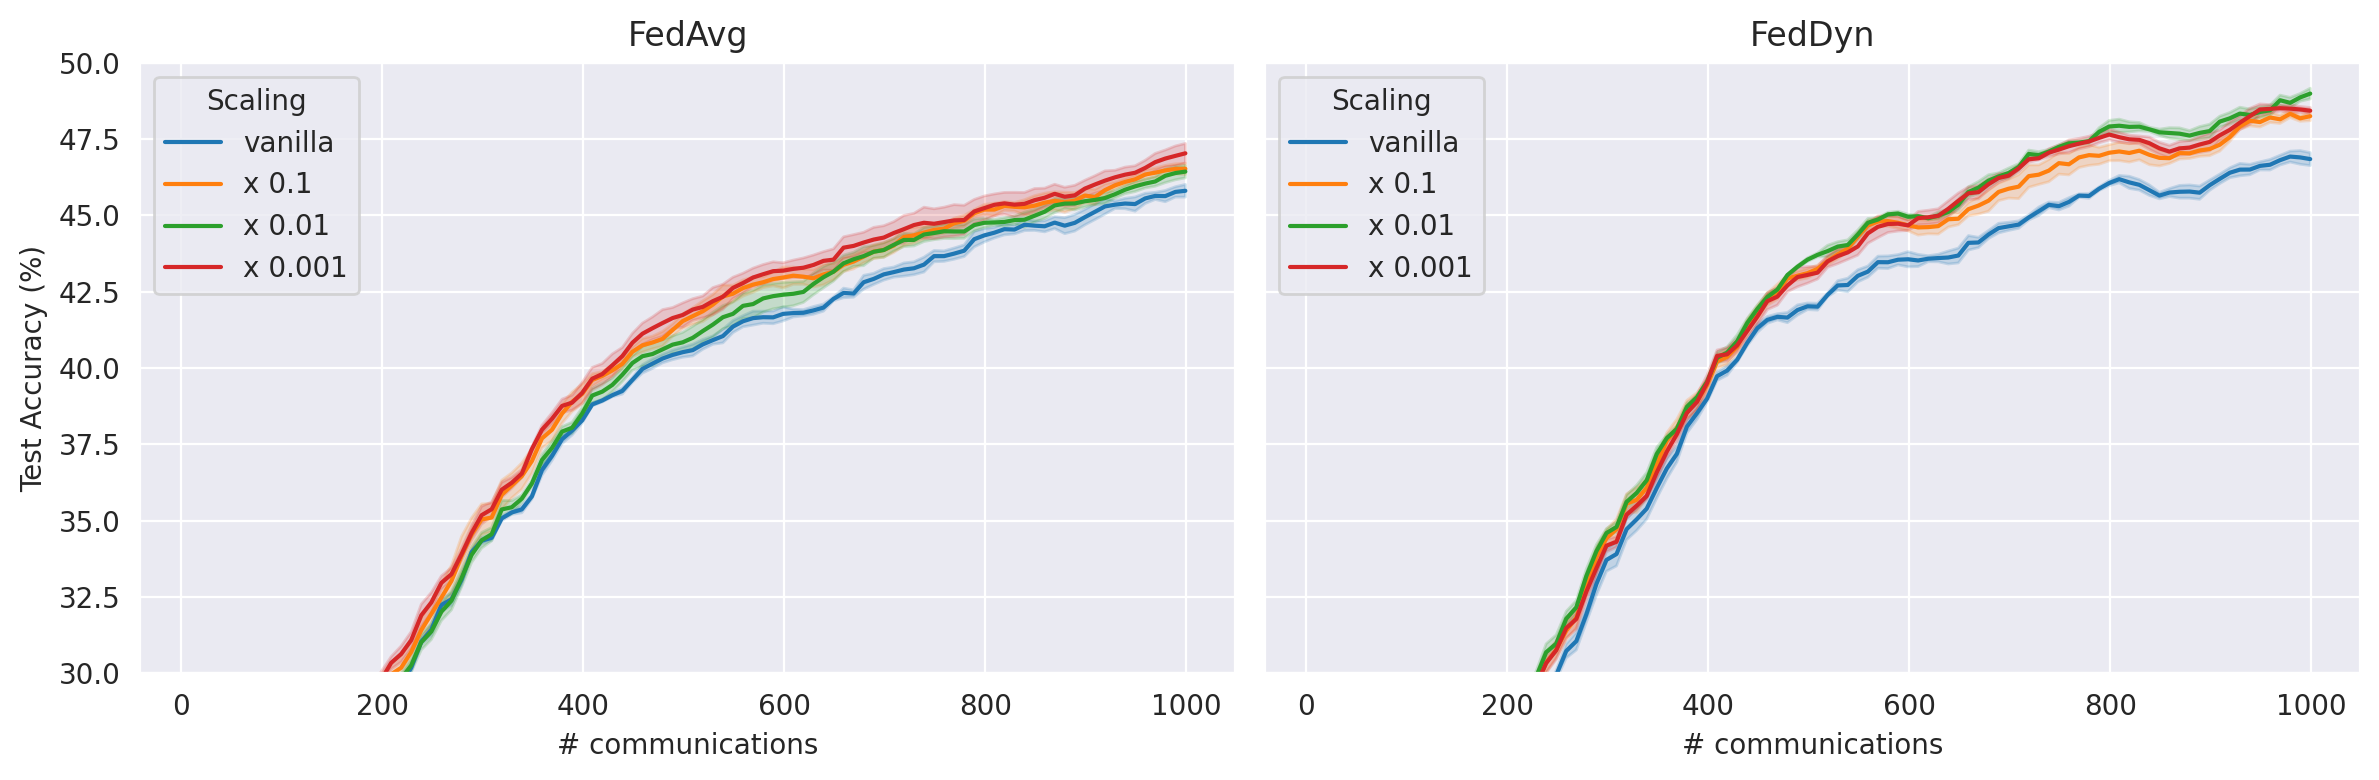

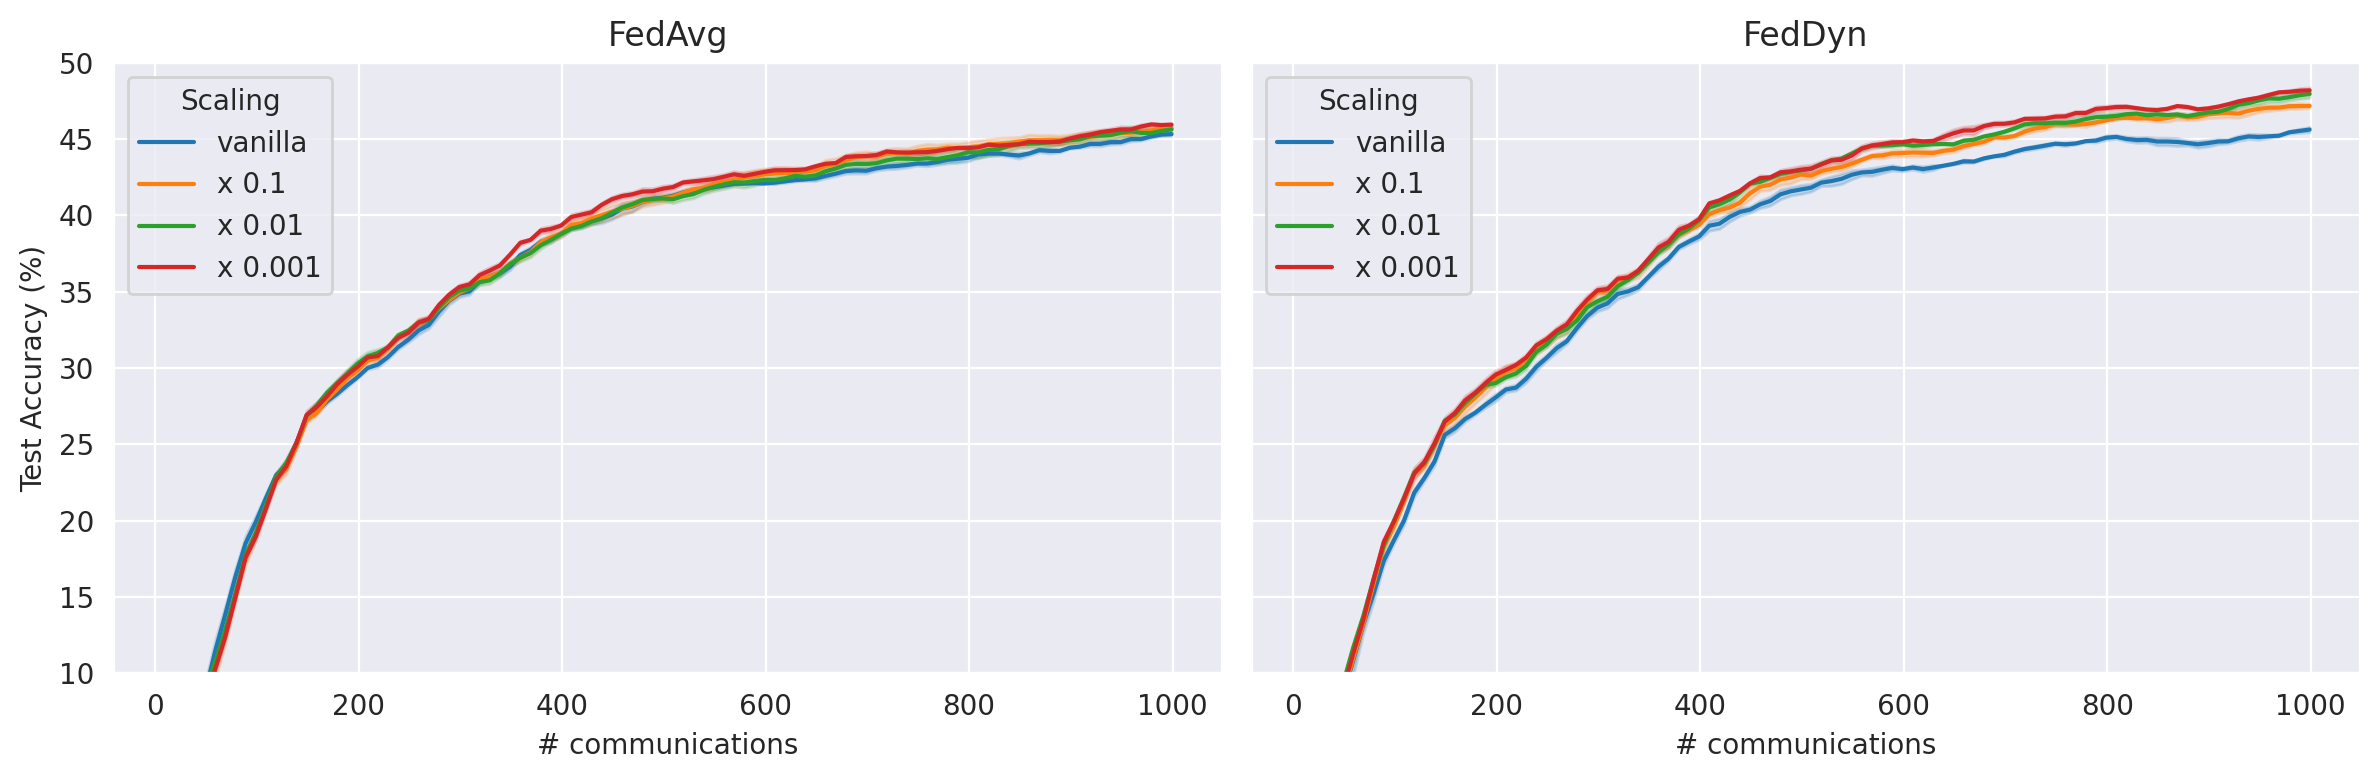

In [ ]:
data_temp = load_data("../Output/CIFAR100-*B0-D0*-N100-P0.01*/s[1-9].csv")

fig, axes = plt.subplots(1, 2, figsize=(12,4), dpi=200, sharey=True)
sns.set_style("darkgrid")
ap = 0.01

ax = axes[0]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == ap]
temp = temp[temp["epoch"] <= 999]
temp = temp[(temp["Distribution"] == "IID partition")]
temp = temp[(temp["Mode"] == "fedavg")]
sk = ["vanilla", "x 0.1", "x 0.01", "x 0.001"]
temp = temp.set_index('Scaling').loc[sk].reset_index()
ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se")
ax.set_ylim([30,50])
ax.set_ylabel("Test Accuracy (%)")
ax.set_title("FedAvg")
ax.set_xlabel("# communications")

ax = axes[1]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == ap]
temp = temp[temp["epoch"] <= 999]
temp = temp[(temp["Distribution"] == "IID partition")]
temp = temp[(temp["Mode"] == "feddyn")]
sk = ["vanilla", "x 0.1", "x 0.01", "x 0.001"]
temp = temp.set_index('Scaling').loc[sk].reset_index()
ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se")
ax.set_ylim([30,50])
ax.set_ylabel("Test Accuracy (%)")
ax.set_title("FedDyn")
ax.set_xlabel("# communications")

# ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
fig.tight_layout()

plt.pause(0.1)




data_temp = load_data("../Output/CIFAR100-*B0-D0*-N100-P0.01*/s[1-9].csv")

fig, axes = plt.subplots(1, 2, figsize=(12,4), dpi=200, sharey=True)
sns.set_style("darkgrid")
ap = 0.01

ax = axes[0]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == ap]
temp = temp[temp["epoch"] <= 999]
temp = temp[(temp["Distribution"] != "IID partition")]
temp = temp[(temp["Mode"] == "fedavg")]
sk = ["vanilla", "x 0.1", "x 0.01", "x 0.001"]
temp = temp.set_index('Scaling').loc[sk].reset_index()
ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se")
ax.set_ylim([10,50])
ax.set_ylabel("Test Accuracy (%)")
ax.set_title("FedAvg")
ax.set_xlabel("# communications")

ax = axes[1]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == ap]
temp = temp[temp["epoch"] <= 999]
temp = temp[(temp["Distribution"] != "IID partition")]
temp = temp[(temp["Mode"] == "feddyn")]
sk = ["vanilla", "x 0.1", "x 0.01", "x 0.001"]
temp = temp.set_index('Scaling').loc[sk].reset_index()
ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se")
ax.set_ylim([10,50])
ax.set_ylabel("Test Accuracy (%)")
ax.set_title("FedDyn")
ax.set_xlabel("# communications")

# ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
fig.tight_layout()

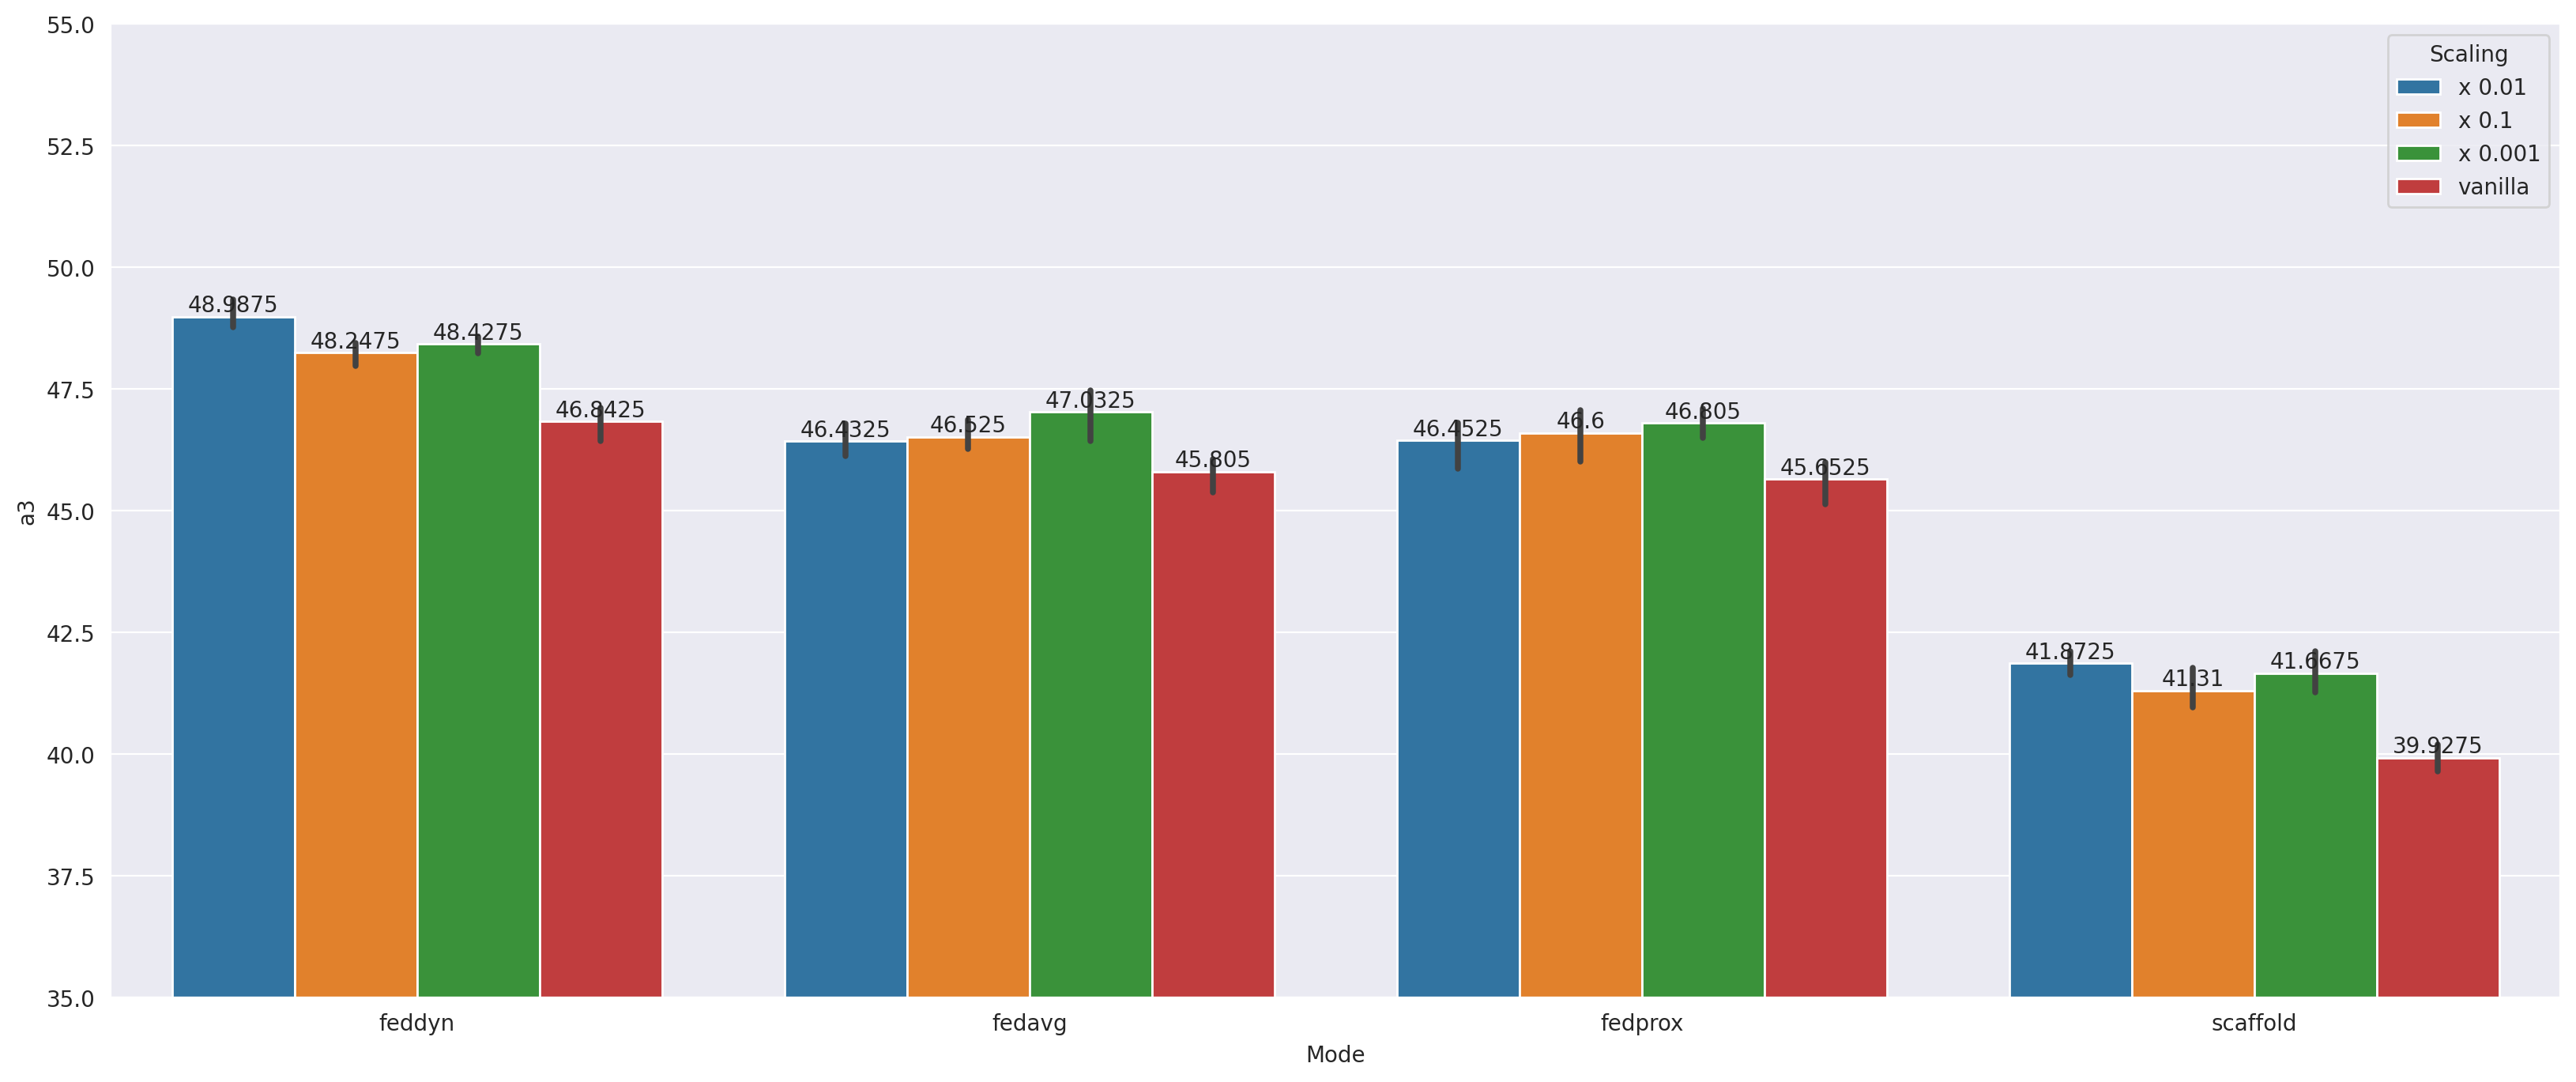

In [16]:
data_temp = load_data("../Output/CIFAR100-*B0-D0*-N100-P0.01*/s[1-9].csv")

fig, axes = plt.subplots(1, 1, figsize=(20,8), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 999]
    temp = temp[(temp["Distribution"] == "IID partition")]
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="Scaling", ax=ax)
    ax.set_ylim([35,55])
    for i in range(4):
        ax.bar_label(ax.containers[i])

tempa = copy.deepcopy(temp)
tempa = tempa.pivot_table(index='Mode', columns='Scaling', values='a3', aggfunc='mean')
sk = ["vanilla", "x 0.1", "x 0.01", "x 0.001"]
tempa.reindex(sk, axis=1)
plt.pause(0.1)

In [84]:
tempa


Scaling,vanilla,x 0.001,x 0.01,x 0.1
Mode,,,,
fedavg,45.8050,47.0325,46.4325,46.5250
feddyn,46.8425,48.4275,48.9875,48.2475
fedprox,45.6525,46.8050,46.4525,46.6000
scaffold,39.9275,41.6675,41.8725,41.3100


Scaling,vanilla,x 0.1,x 0.01,x 0.001
Mode,,,,
fedavg,45.3200,45.7025,45.6275,45.9425
feddyn,45.6200,47.1650,47.9500,48.1850
fedprox,44.4875,45.7425,45.6300,45.3500
scaffold,35.1625,37.6350,37.9050,37.7100


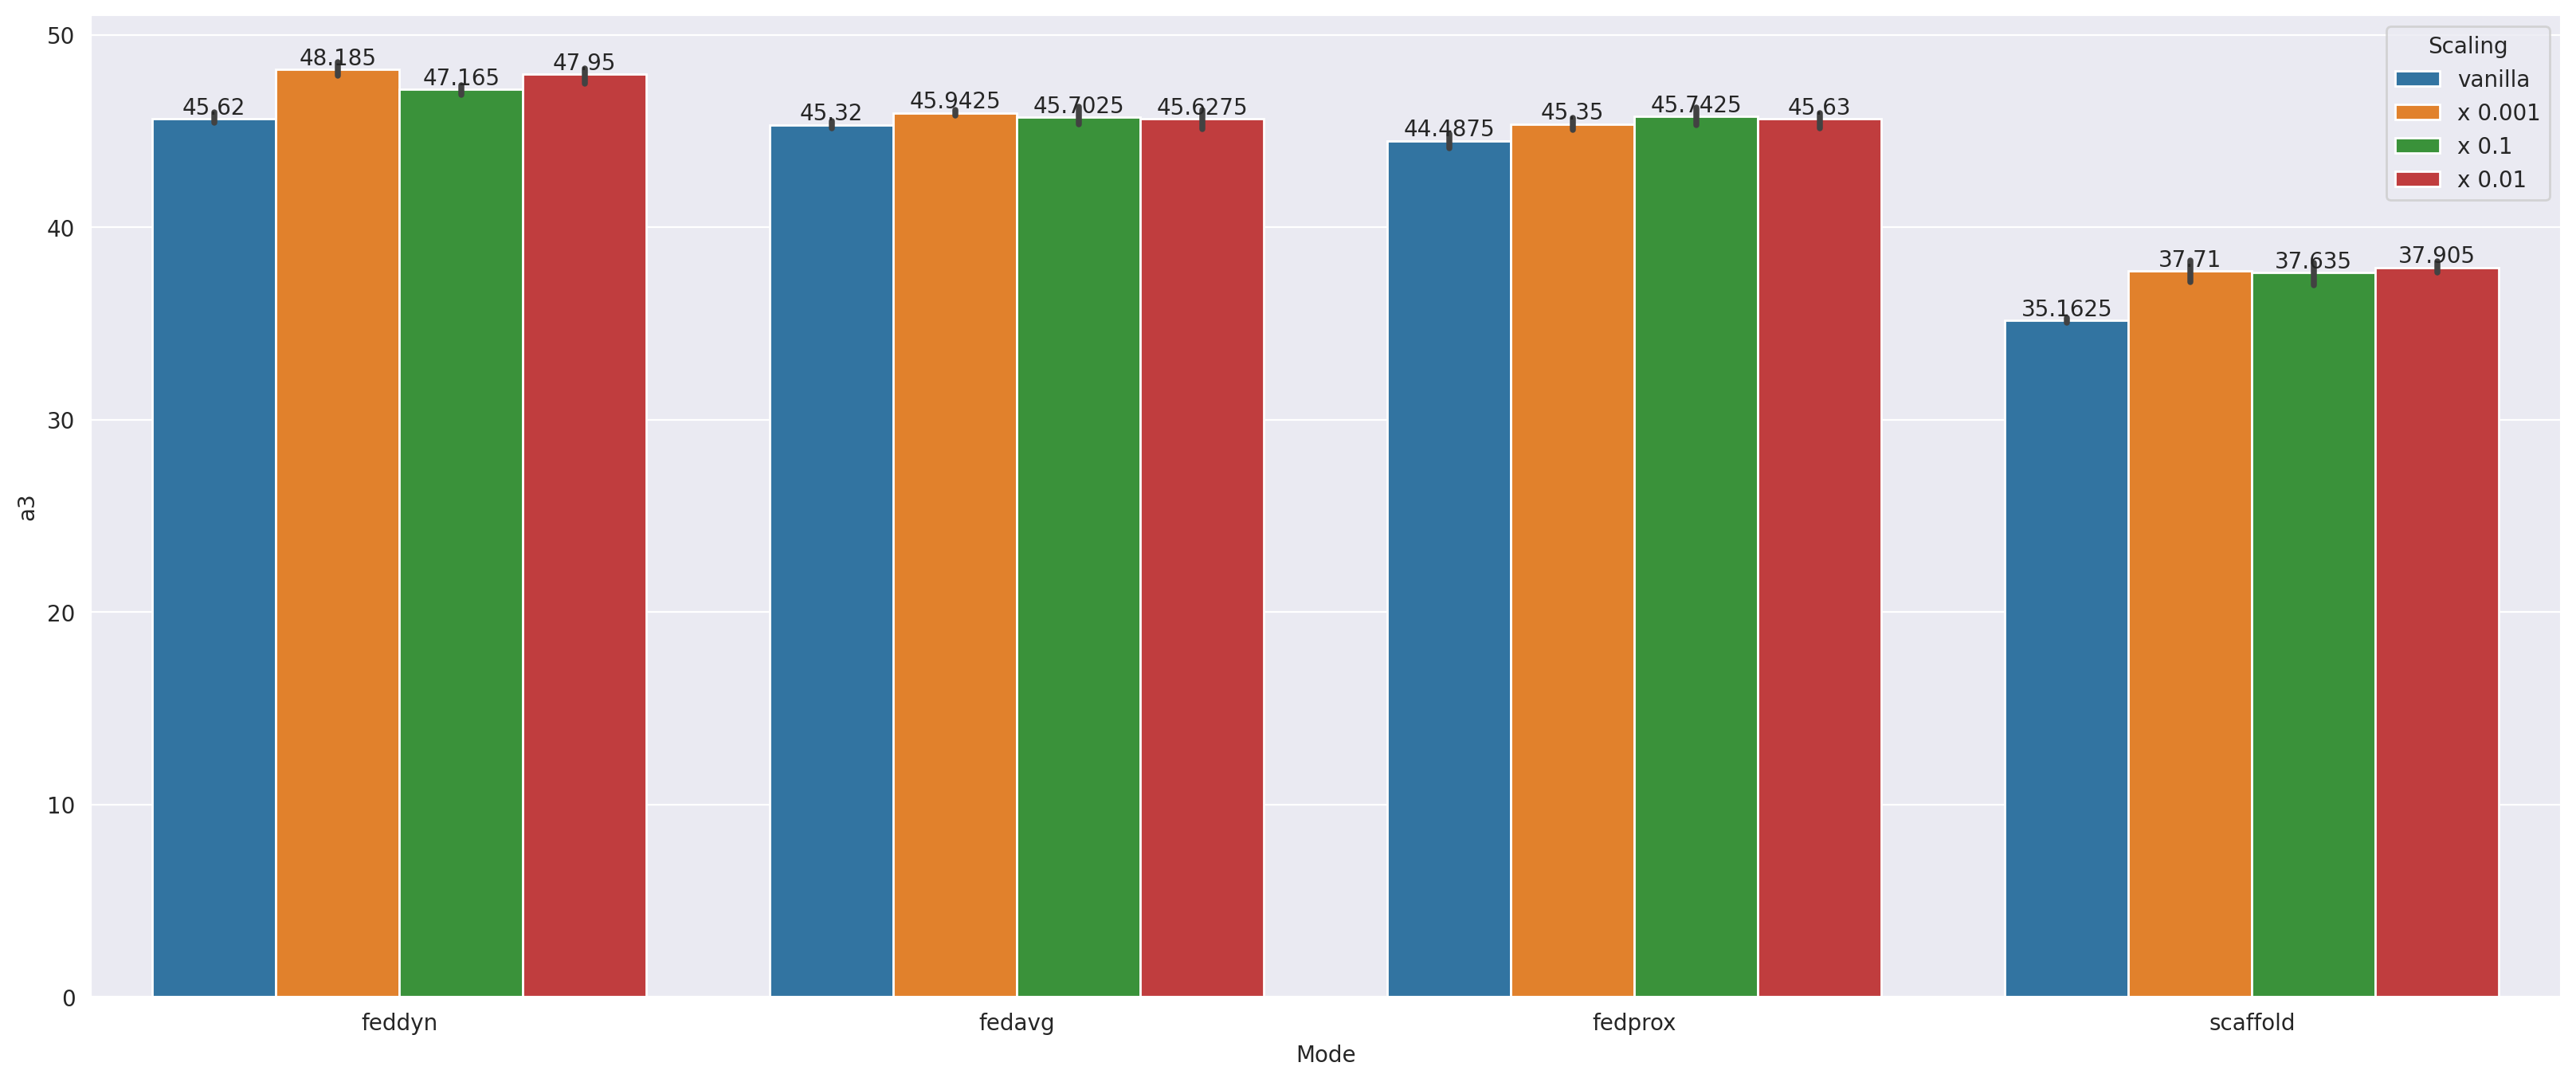

In [85]:
data_temp = load_data("../Output/CIFAR100-*B0-D0*-N100-P0.01*/s[1-9].csv")

fig, axes = plt.subplots(1, 1, figsize=(20,8), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 999]
    temp = temp[(temp["Distribution"] != "IID partition")]
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="Scaling", ax=ax)
    for i in range(4):
        ax.bar_label(ax.containers[i])

tempa = copy.deepcopy(temp)
tempa = tempa.pivot_table(index='Mode', columns='Scaling', values='a3', aggfunc='mean')
sk = ["vanilla", "x 0.1", "x 0.01", "x 0.001"]
# temp = temp.set_index('Scaling').loc[sk].reset_index()
tempa.reindex(sk, axis=1)

In [39]:
glue = temp.pivot(["Mode", "Scaling", "a3"], append=True)
# glue = temp.reset_index().pivot_table(values="a3", index=["Mode", "Scaling"], aggfunc='mean')
sns.heatmap(glue, annot=True)

/tmp/ipykernel_2463083/1690240597.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue = temp.pivot(["Mode", "Scaling", "a3"], append=True)


TypeError: DataFrame.pivot() got an unexpected keyword argument 'append'

Scaling,vanilla,x 0.1,x 0.01,x 0.001
Mode,,,,
fedavg,80.1200,80.2925,80.2125,80.165
feddyn,80.8150,81.0775,81.1525,81.230
fedprox,80.3300,80.2150,80.1075,80.150
scaffold,78.3075,78.4500,78.3675,78.460


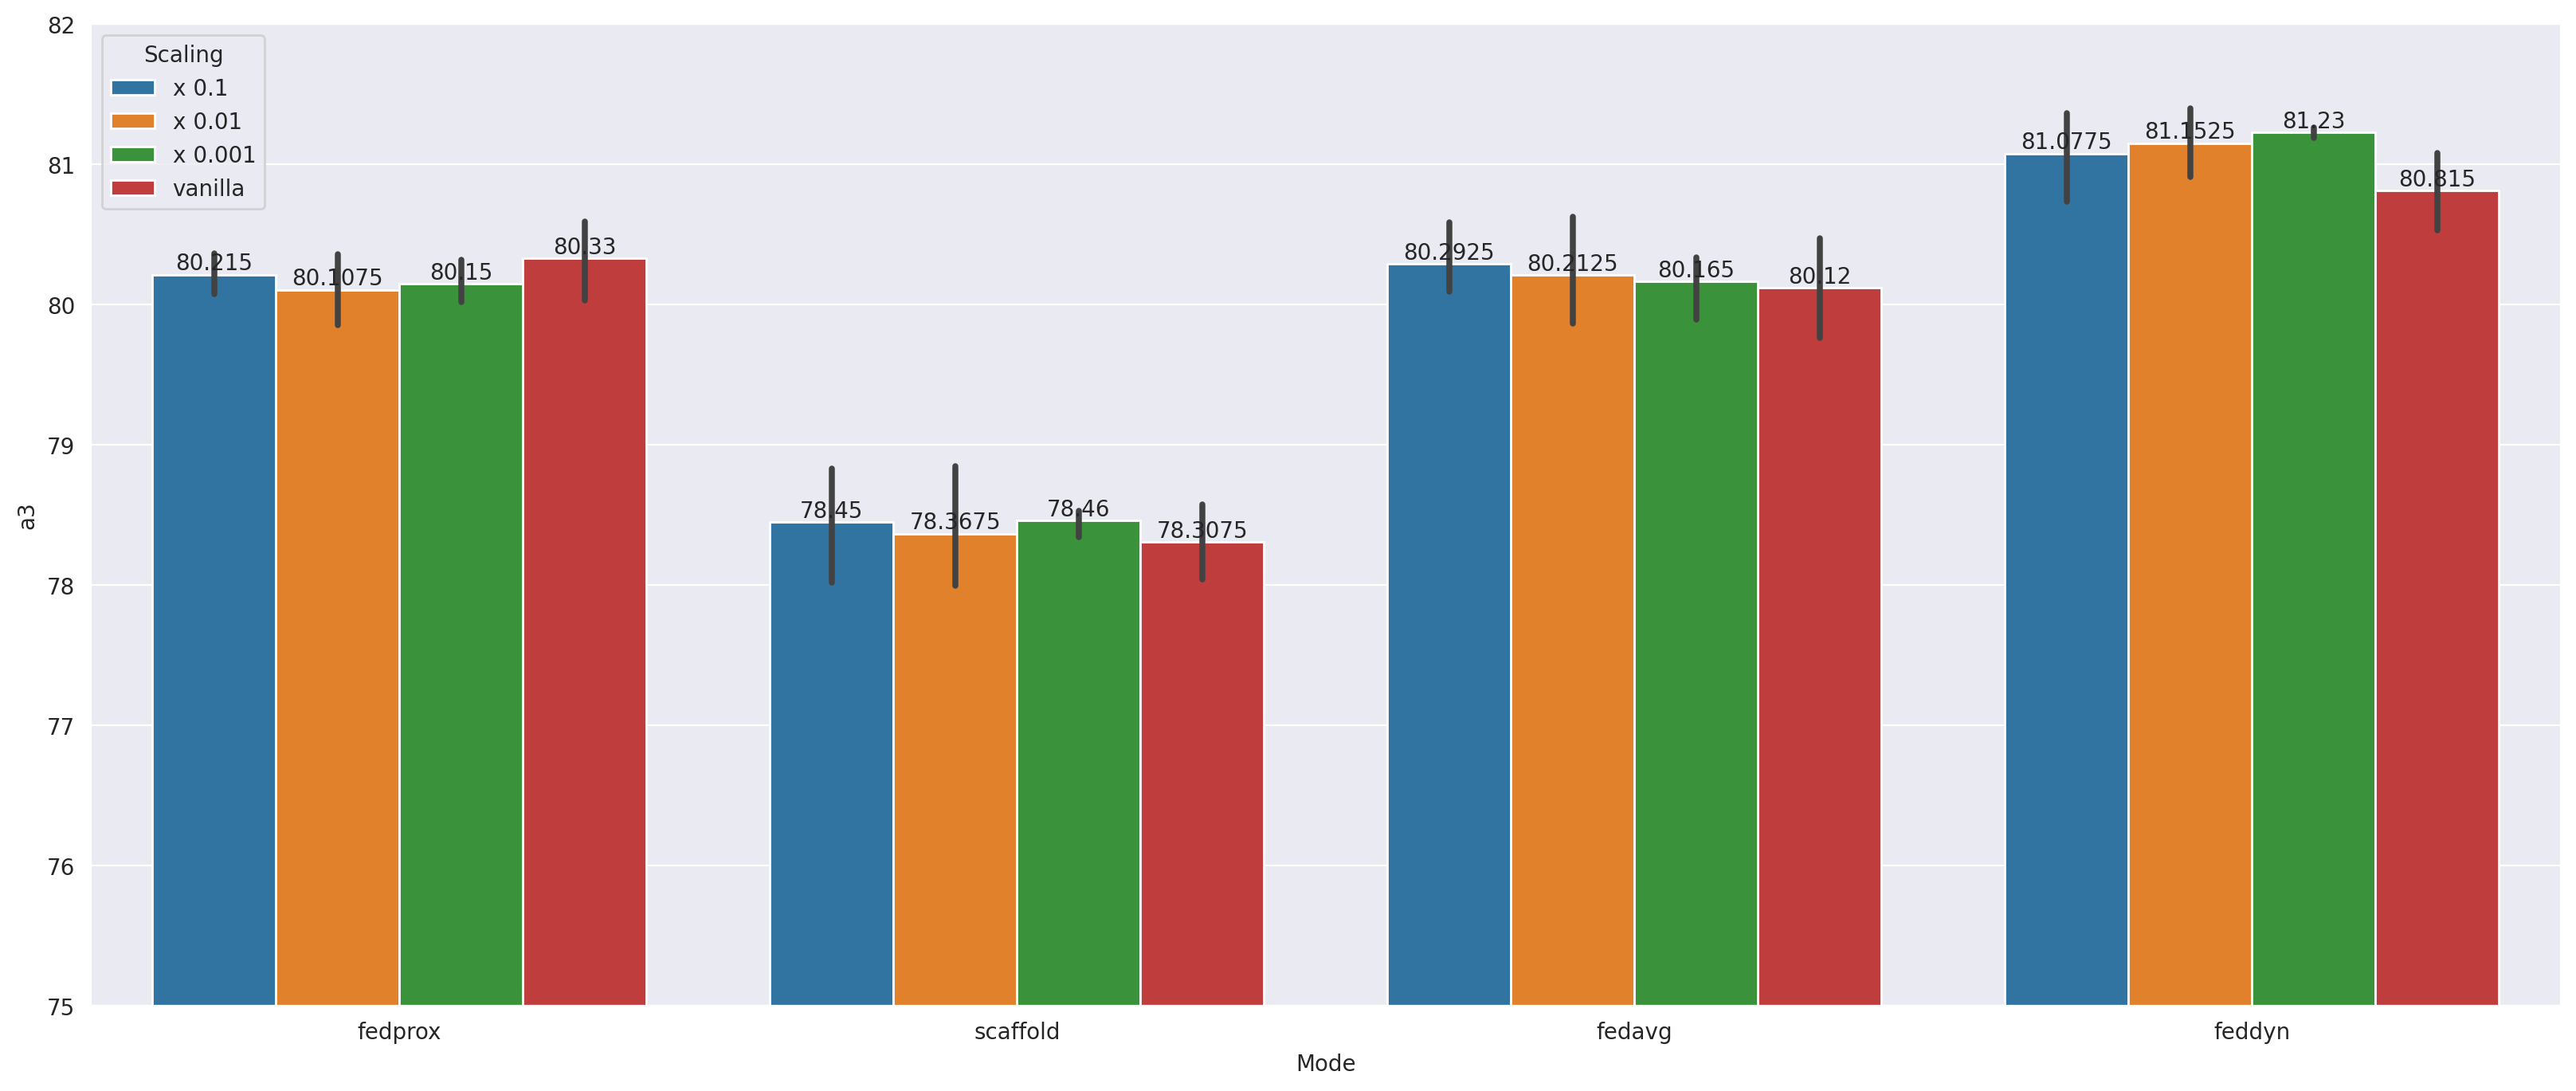

In [60]:
data_temp = load_data("../Output/CIFAR10-*-N100-P0.01*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 1, figsize=(20,8), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 499]
    temp = temp[(temp["Distribution"] == "IID partition")]
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="Scaling", ax=ax)
    ax.set_ylim([75,82])
    for i in range(4):
        ax.bar_label(ax.containers[i])

tempa = copy.deepcopy(temp)
tempa = tempa.pivot_table(index='Mode', columns='Scaling', values='a3', aggfunc='mean')
sk = ["vanilla", "x 0.1", "x 0.01", "x 0.001"]
# temp = temp.set_index('Scaling').loc[sk].reset_index()
tempa.reindex(sk, axis=1)

Scaling,1.000,0.100,0.010,0.001
Mode,,,,
fedavg,80.1200,80.2925,80.2125,80.165
feddyn,80.8150,81.0775,81.1525,81.230
fedprox,80.3300,80.2150,80.1075,80.150
scaffold,78.3075,78.4500,78.3675,78.460


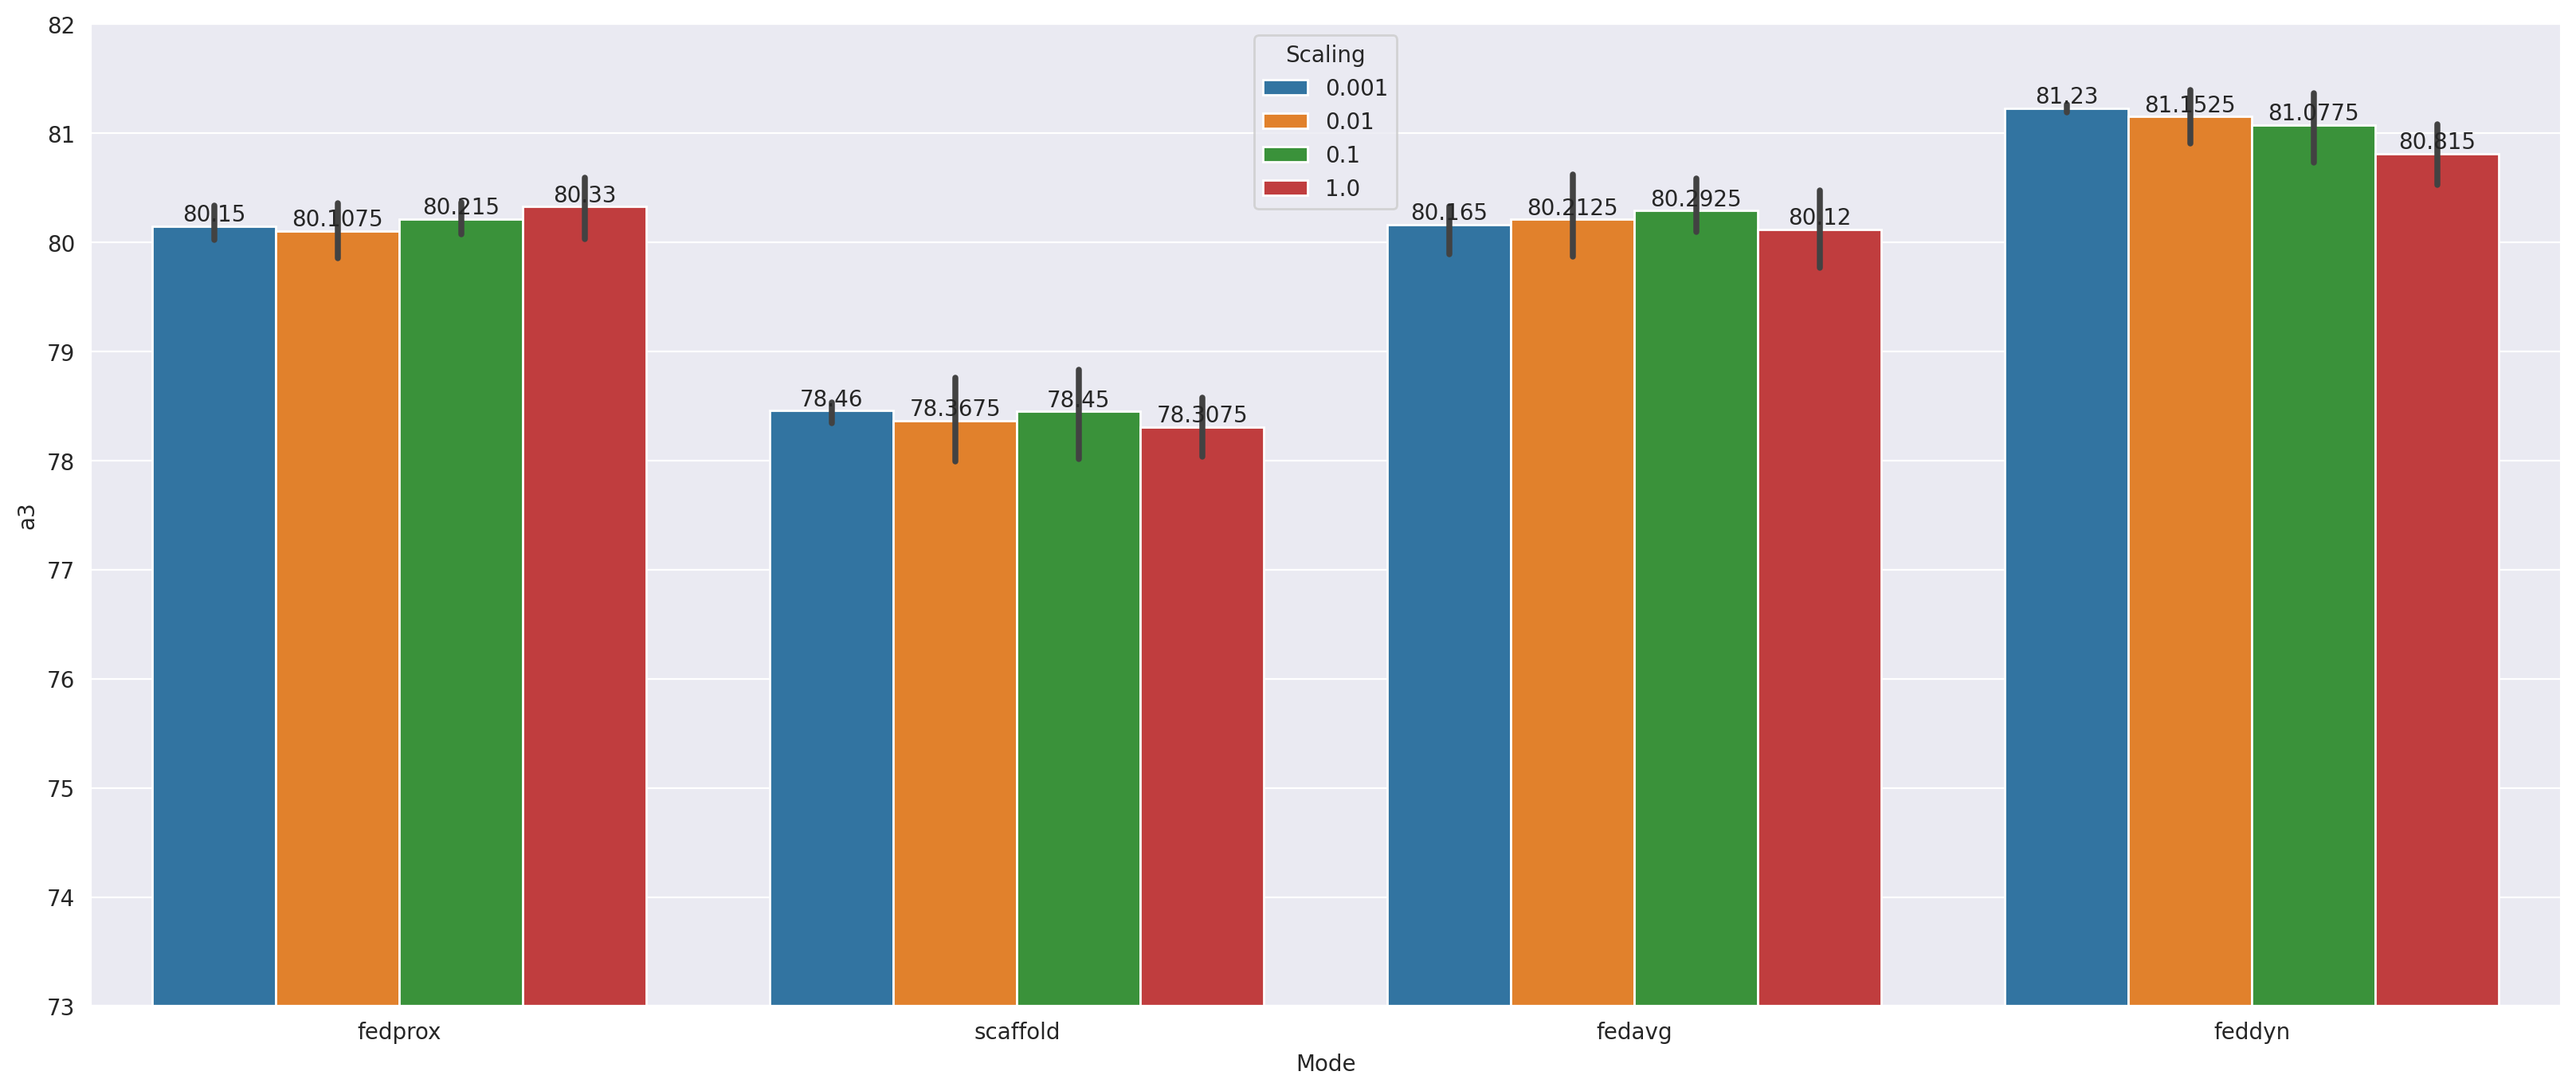

In [25]:
data_temp = load_data("../Output/CIFAR10-*-N100-P0.01*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 1, figsize=(20,8), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 499]
    temp = temp[(temp["Distribution"] == "IID partition")]
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="Scaling", ax=ax)
    ax.set_ylim([73,82])
    for i in range(4):
        ax.bar_label(ax.containers[i])

tempa = copy.deepcopy(temp)
tempa = tempa.pivot_table(index='Mode', columns='Scaling', values='a3', aggfunc='mean')
tempa.reindex([1, 0.1, 0.01, 0.001], axis=1)
# tempa.reindex(["fedavg", "fedprox", "scaffold", "feddyn"], axis=0)

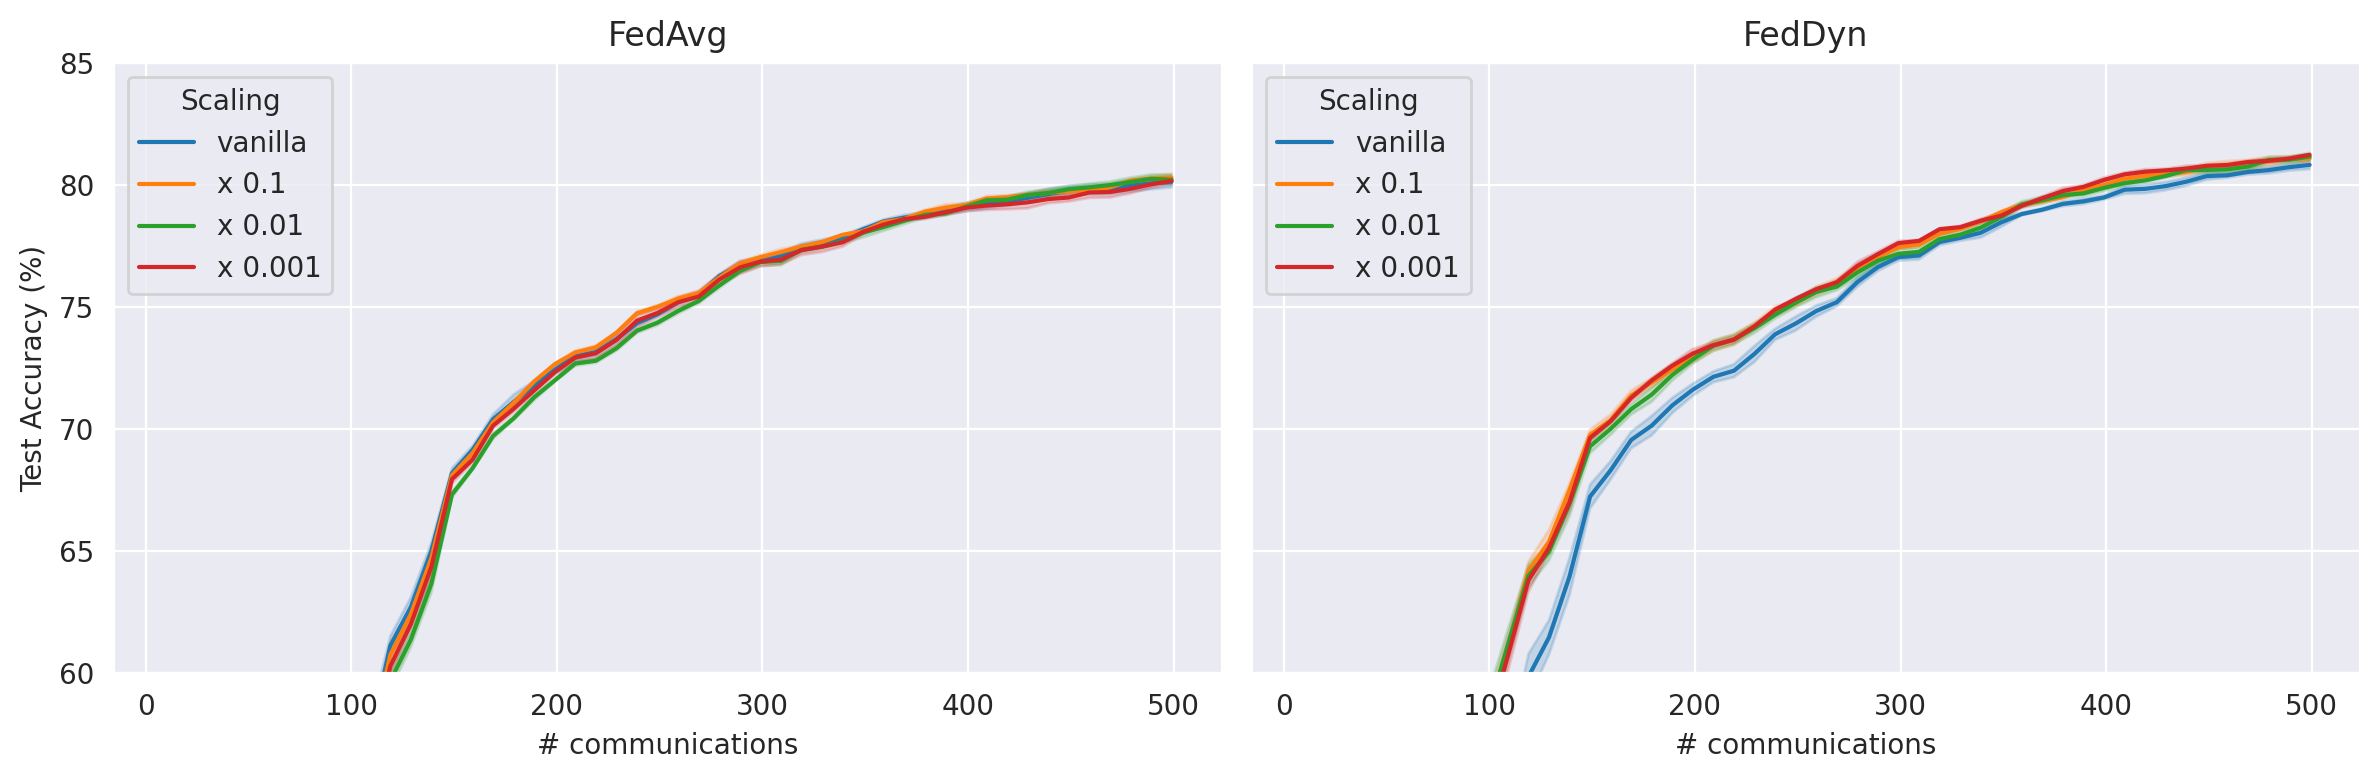

In [80]:
data_temp = load_data("../Output/CIFAR10-*-N100-P0.01*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 2, figsize=(12,4), dpi=200, sharey=True)
sns.set_style("darkgrid")
ap = 0.01

ax = axes[0]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == ap]
temp = temp[temp["epoch"] <= 499]
temp = temp[(temp["Distribution"] == "IID partition")]
temp = temp[(temp["Mode"] == "fedavg")]
sk = ["vanilla", "x 0.1", "x 0.01", "x 0.001"]
temp = temp.set_index('Scaling').loc[sk].reset_index()
ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se")
ax.set_ylabel("Test Accuracy (%)")
ax.set_title("FedAvg")
ax.set_xlabel("# communications")

ax = axes[1]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == ap]
temp = temp[temp["epoch"] <= 499]
temp = temp[(temp["Distribution"] == "IID partition")]
temp = temp[(temp["Mode"] == "feddyn")]
sk = ["vanilla", "x 0.1", "x 0.01", "x 0.001"]
temp = temp.set_index('Scaling').loc[sk].reset_index()
ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se")
ax.set_ylabel("Test Accuracy (%)")
ax.set_title("FedDyn")
ax.set_xlabel("# communications")
ax.set_ylim([60,85])

# ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
fig.tight_layout()

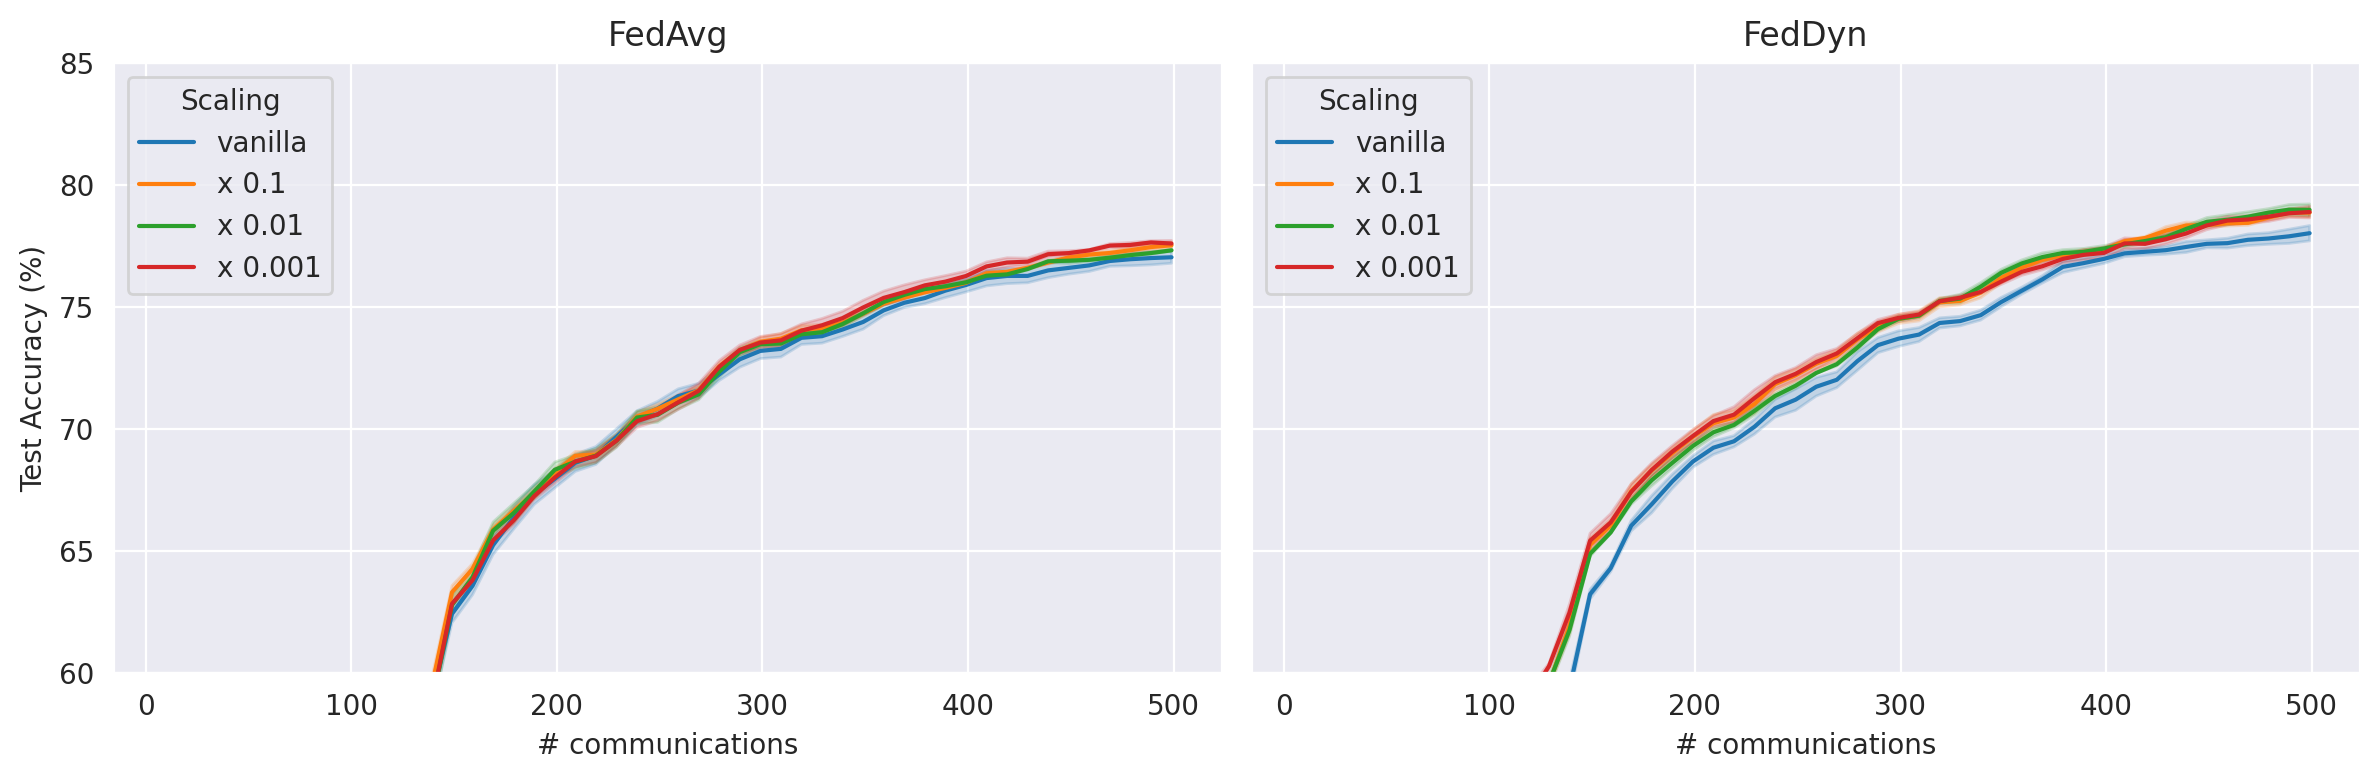

In [78]:
data_temp = load_data("../Output/CIFAR10-*-N100-P0.01*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 2, figsize=(12,4), dpi=200, sharey=True)
sns.set_style("darkgrid")
ap = 0.01

ax = axes[0]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == ap]
temp = temp[temp["epoch"] <= 499]
temp = temp[(temp["Distribution"] != "IID partition")]
temp = temp[(temp["Mode"] == "fedavg")]
sk = ["vanilla", "x 0.1", "x 0.01", "x 0.001"]
temp = temp.set_index('Scaling').loc[sk].reset_index()
ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se")
ax.set_ylabel("Test Accuracy (%)")
ax.set_title("FedAvg")
ax.set_xlabel("# communications")

ax = axes[1]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == ap]
temp = temp[temp["epoch"] <= 499]
temp = temp[(temp["Distribution"] != "IID partition")]
temp = temp[(temp["Mode"] == "feddyn")]
sk = ["vanilla", "x 0.1", "x 0.01", "x 0.001"]
temp = temp.set_index('Scaling').loc[sk].reset_index()
ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se")
ax.set_ylabel("Test Accuracy (%)")
ax.set_title("FedDyn")
ax.set_xlabel("# communications")
ax.set_ylim([60,85])

# ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
fig.tight_layout()